In [83]:
#reference
#https://keras.io/applications/
#https://www.pyimagesearch.com/

import os
import matplotlib.pyplot as plt
from imutils import paths
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Model
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.metrics import classification_report

In [65]:
imagePath=list(paths.list_images("dataset"))

In [66]:
data=[]
labels=[]

for imPath in imagePath:
    label=imPath.split(os.path.sep)[-2]
    img=cv2.imread(imPath)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(224,224))
    data.append(img)
    labels.append(label)

In [67]:
data=np.array(data)/255.0
label=np.array(labels)
lb=LabelBinarizer()
label=lb.fit_transform(label)

label=to_categorical(label)

In [68]:
train_X,test_X,train_y,test_y=train_test_split(data,label, test_size=0.2,stratify=label,random_state=40)

In [69]:
model=Sequential()
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=3, activation="relu") )
model.add(Conv2D(64, kernel_size=3, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))


In [70]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 64)      36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 218, 218, 64)      36928     
_________________________________________________________________
dense_10 (Dense)             (None, 218, 218, 4)       260       
_________________________________________________________________
flatten_4 (Flatten)          (None, 190096)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                12166208  
_________________________________________________________________
activation_4 (Activation)    (None, 64)               

In [71]:
opt=Adam(lr=0.0001, decay=0.0001/20)
model.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])

In [76]:
filepath="covid-19.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [77]:
H=model.fit(train_X, train_y, epochs=20, validation_data=(test_X, test_y), callbacks=callbacks_list)


Train on 40 samples, validate on 10 samples
Epoch 1/20
40/40 [==============================] - 10s 258ms/step - loss: 0.1252 - accuracy: 0.9750 - val_loss: 0.0388 - val_accuracy: 1.0000

Epoch 00001: val_accuracy improved from -inf to 1.00000, saving model to covid-19.hdf5
Epoch 2/20
40/40 [==============================] - 10s 245ms/step - loss: 0.0925 - accuracy: 0.9750 - val_loss: 0.0149 - val_accuracy: 1.0000

Epoch 00002: val_accuracy did not improve from 1.00000
Epoch 3/20
40/40 [==============================] - 11s 285ms/step - loss: 0.0880 - accuracy: 0.9750 - val_loss: 0.0492 - val_accuracy: 1.0000

Epoch 00003: val_accuracy did not improve from 1.00000
Epoch 4/20
40/40 [==============================] - 12s 299ms/step - loss: 0.1920 - accuracy: 0.9000 - val_loss: 0.0167 - val_accuracy: 1.0000

Epoch 00004: val_accuracy did not improve from 1.00000
Epoch 5/20
40/40 [==============================] - 11s 284ms/step - loss: 0.0817 - accuracy: 0.9750 - val_loss: 0.0260 - val_ac

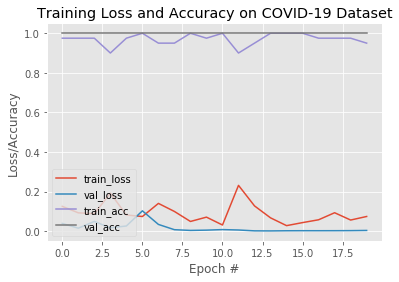

In [86]:
train_loss=H.history['loss']
val_loss=H.history['val_loss']
N=20 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


In [85]:
pred=model.predict(test_X)
pred = np.argmax(pred, axis=1)
print(classification_report(test_y.argmax(axis=1), pred, target_names=lb.classes_))

              precision    recall  f1-score   support

       covid       1.00      1.00      1.00         5
      normal       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

